In [141]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [143]:
df.shape
#Відповідь: Про скільки книг зберігає дані датасет? 549

(550, 7)

In [144]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [145]:
df.isna().sum()
#Відповідь: Чи є в якихось змінних пропуски? Ні

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [146]:
df['genre'].unique()
#Відповідь: Які є унікальні жанри? 'Non Fiction', 'Fiction'

array(['Non Fiction', 'Fiction'], dtype=object)

<Axes: ylabel='Frequency'>

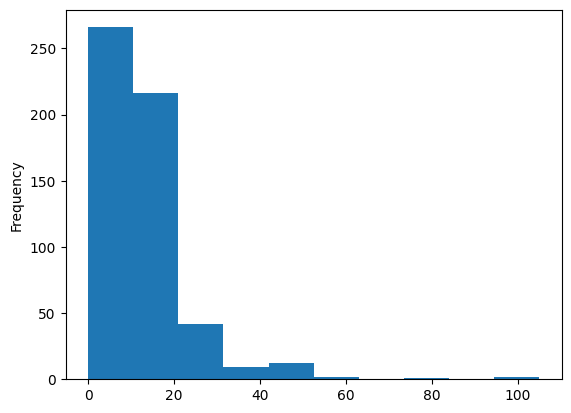

In [147]:
df['price'].plot(kind='hist')

In [148]:
#Відповідь: Максимальна ціна? 0
print(min(df['price']))
#Відповідь: Мінімальна ціна? 105
print(max(df['price']))
#Відповідь: Середня ціна? 13.1
print(np.average(df['price']))
#Відповідь: Медіанна ціна? 11.0
print(np.median(df['price']))

0
105
13.1
11.0


In [149]:
#Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9
print(max(df['user_rating']))
#Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52
print(len(df[df['user_rating'] == max(df['user_rating'])]))



4.9
52


In [150]:
#Відповідь: Яка книга має найбільше відгуків? Відповідь:Where the Crawdads Sing
df[df['reviews'] == max(df['reviews'])]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [151]:
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
top_50 = df[df['year'] == 2015]
top_50[top_50 ['price'] == max(top_50['price'])]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [152]:
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20
df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 2010 - 0, 2011 - 1
df[(df['user_rating'] == 4.9) & (df['year'].isin([2010,2011]))].groupby('year').agg('count')['user_rating']

year
2011    1
Name: user_rating, dtype: int64

In [153]:
df[(df['year'] == 2015)&(df['price']<8)].sort_values(by=['price'])
#Відповідь: Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [154]:
df.groupby('genre').agg({'price':['min', 'max']})
#Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82
#Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0
#Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105
#Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [155]:
df_grouped_count = df.groupby('author').agg({'name':'count'}).rename(columns={'name':'number_of_books'})
#Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248 X 1
df_grouped_count[df_grouped_count['number_of_books'] == max(df_grouped_count['number_of_books'])]
#Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
#Відповідь: Скільки книг цього автора? Відповідь: 12

,number_of_books
author,
Jeff Kinney,12


In [156]:
df_grouped_avg_rate = df.groupby('author').agg({'user_rating':'mean'})
df_grouped_avg_rate[df_grouped_avg_rate['user_rating'] == min(df_grouped_avg_rate['user_rating']) ]

#Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
#Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9

,user_rating
author,
Donna Tartt,3.9


In [157]:
df_concated = pd.concat([df_grouped_count, df_grouped_avg_rate], axis = 1).sort_values(by = ['number_of_books', 'user_rating'])
df_concated

#Відповідь: Який автор перший у списку? Muriel Barbery


,number_of_books,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


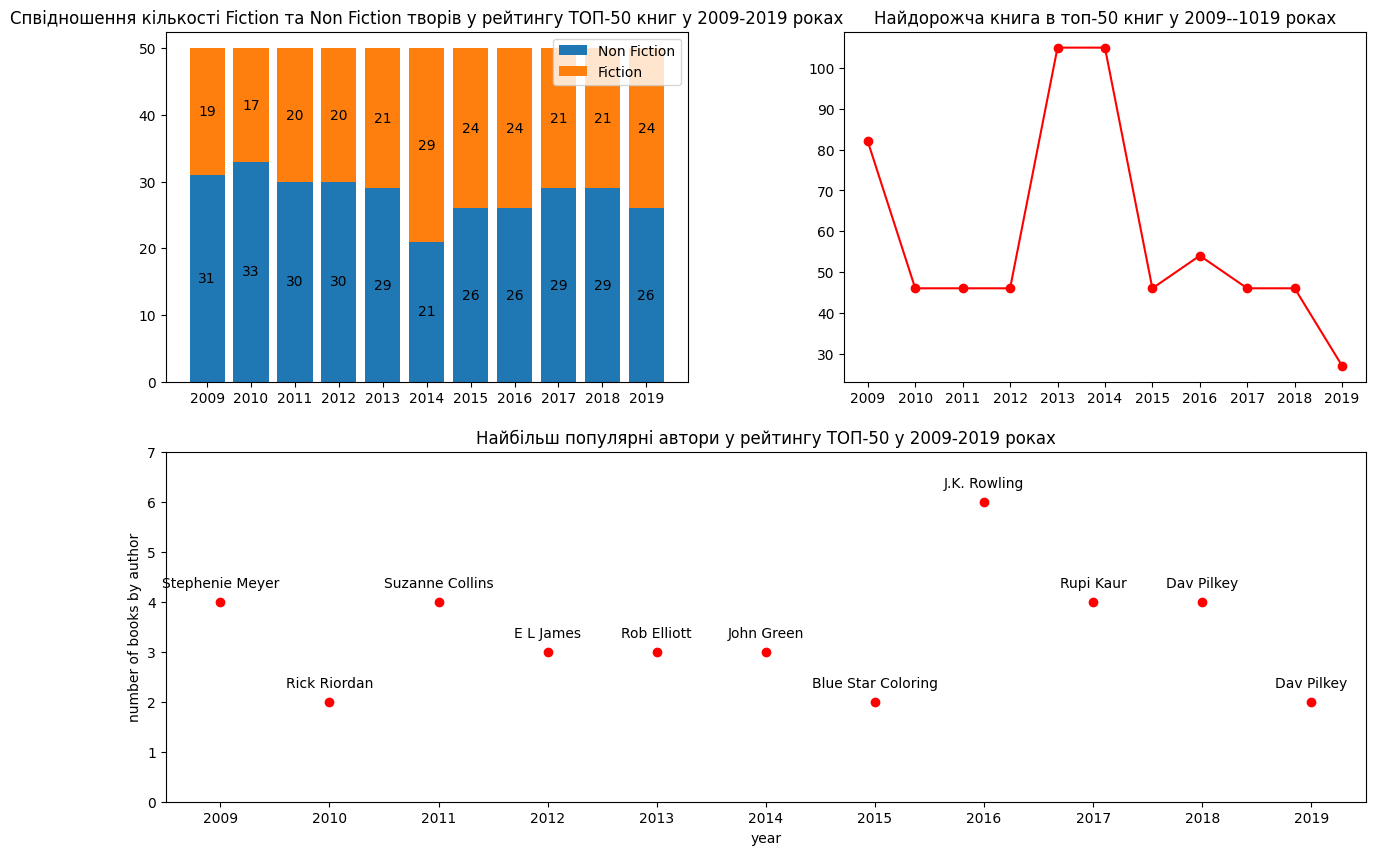

In [249]:
fig = plt.figure(layout=None, facecolor='white', figsize=[15,10])
gs = fig.add_gridspec(nrows=2, ncols=2, left=0.1, right=0.9,
                      hspace=0.2, wspace=0.3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])

years = df['year'].unique()
df_grouped_by_year_genre = df.groupby(['year', 'genre']).count()['name']


type_counts = {"Non Fiction": df_grouped_by_year_genre[df_grouped_by_year_genre.index.get_level_values('genre')== 'Non Fiction'], "Fiction":df_grouped_by_year_genre[df_grouped_by_year_genre.index.get_level_values('genre')=='Fiction'] }

bottom = np.zeros(len(years))

for type, number in type_counts.items():
    data_point = ax0.bar(years, number, label = type, bottom = bottom)
    bottom += number
    ax0.bar_label(data_point, label_type='center')

ax0.set_title('Спвідношення кількості Fiction та Non Fiction творів у рейтингу ТОП-50 книг у 2009-2019 роках' )
ax0.legend()
ax0.set_xticks(years)

df_grouped_by_year = df.groupby(['year']).max()
second_chart = ax1.plot(df_grouped_by_year['price'], 'o-r')
ax1.set_title('Найдорожча книга в топ-50 книг у 2009--1019 роках' )
ax1.set_xticks(years)


df_unique_books = df.groupby(['year', 'author'])['name'].count()
most_popular_authors = {}
most_popular_authors_values = []

for year in np.sort(years):
    s = df_unique_books[df_unique_books.index.get_level_values(level=0) == year]
    most_popular_authors[year] = s.idxmax()[1]
    most_popular_authors_values.append(int(s.max()))

ax2.plot(years, most_popular_authors_values,'ro')
ax2.set_xticks(years)
ax2.set(xlabel='year', ylabel='number of books by author',
       title='Найбільш популярні автори у рейтингу ТОП-50 у 2009-2019 роках')
ax2.set_ylim([0,7])
for x, y in zip(years,most_popular_authors_values):
    label = most_popular_authors[x]
    label
    ax2.annotate(label,textcoords="offset points",xy = (x,y),
                 xytext=(0,10),
                 ha='center')

In [190]:
most_popular_authors_values


[np.int64(6),
 np.int64(4),
 np.int64(4),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(3)]